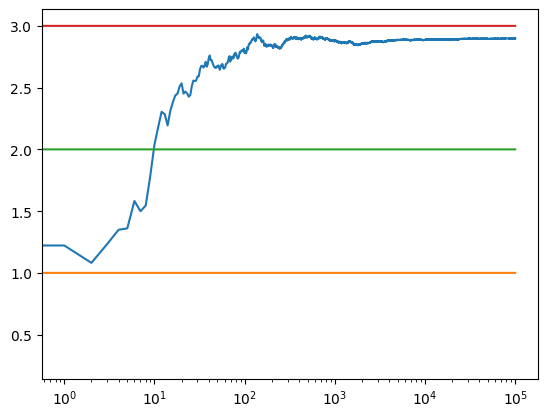

0.9997278175810116
1.9989873695796292
2.996876053251394


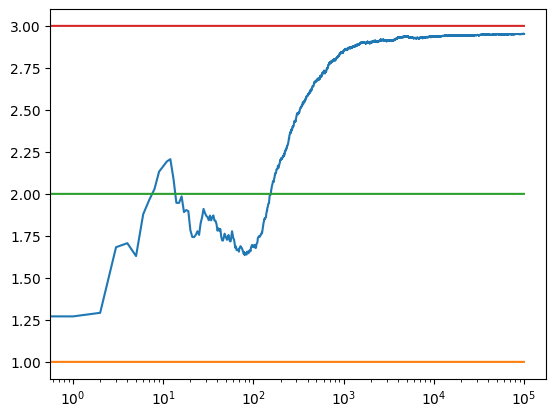

0.9914971333051583
1.9897889356319414
3.0034555454427987


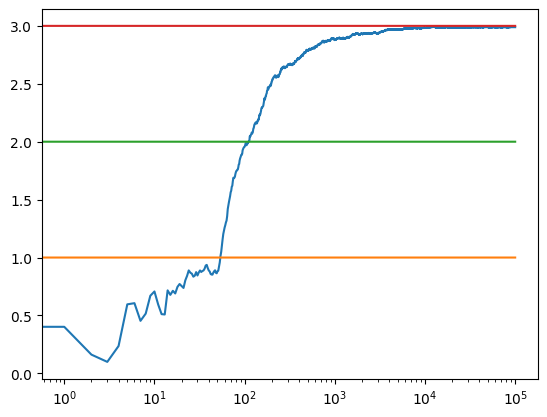

0.9556685298873779
1.9073837999485002
3.0006480435423217


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
  
# Define Action class 
class Actions: 
  def __init__(self, m): 
    self.m = m 
    self.mean = 0
    self.N = 0
  
  # Choose a random action 
  def choose(self):  
    return np.random.randn() + self.m 
  
  # Update the action-value estimate 
  def update(self, x): 
    self.N += 1
    self.mean = (1 - 1.0 / self.N)*self.mean + 1.0 / self.N * x 
  
  
def run_experiment(m1, m2, m3, eps, N): 
      
  actions = [Actions(m1), Actions(m2), Actions(m3)] 
  
  data = np.empty(N) 
    
  for i in range(N): 
    # epsilon greedy 
    p = np.random.random() 
    if p < eps: 
      j = np.random.choice(3) 
    else: 
      j = np.argmax([a.mean for a in actions]) 
    x = actions[j].choose() 
    actions[j].update(x) 
  
    # for the plot 
    data[i] = x 
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1) 
  
  # plot moving average ctr 
  plt.plot(cumulative_average) 
  plt.plot(np.ones(N)*m1) 
  plt.plot(np.ones(N)*m2) 
  plt.plot(np.ones(N)*m3) 
  plt.xscale('log') 
  plt.show() 
  
  for a in actions: 
    print(a.mean) 
  
  return cumulative_average 
  
  
if __name__ == '__main__': 
      
  c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000) 
  c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000) 
  c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000) 

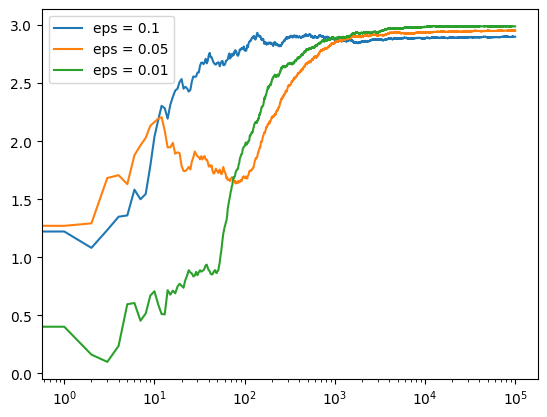

In [2]:
# log scale plot 
plt.plot(c_1, label ='eps = 0.1') 
plt.plot(c_05, label ='eps = 0.05') 
plt.plot(c_01, label ='eps = 0.01') 
plt.legend() 
plt.xscale('log') 
plt.show() 


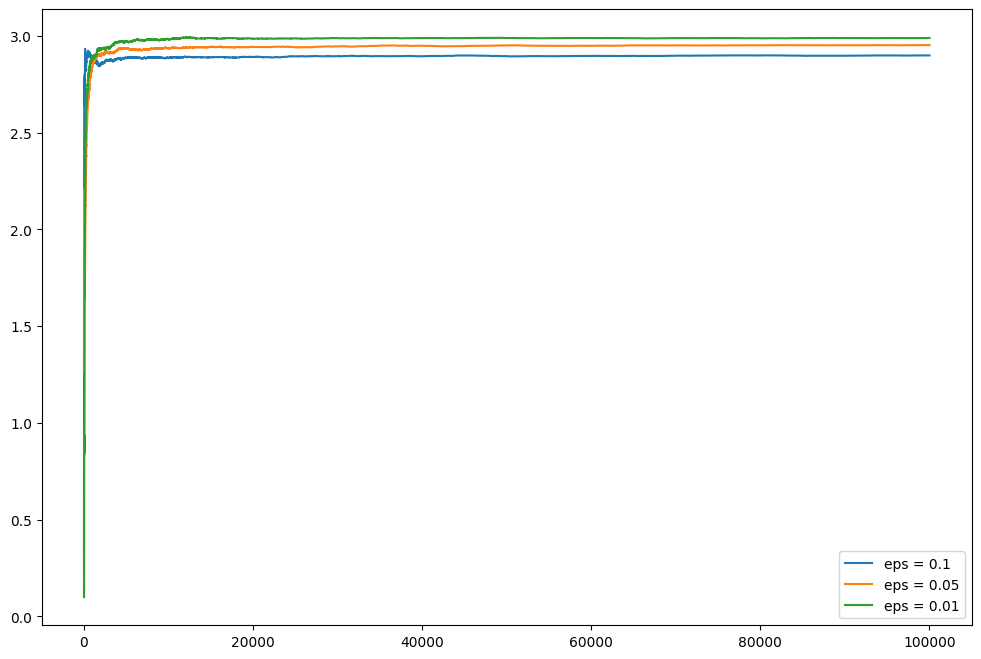

In [3]:
# linear plot 
plt.figure(figsize = (12, 8)) 
plt.plot(c_1, label ='eps = 0.1') 
plt.plot(c_05, label ='eps = 0.05') 
plt.plot(c_01, label ='eps = 0.01') 
plt.legend() 
plt.show() 
